(12089, 785)
(12089,)


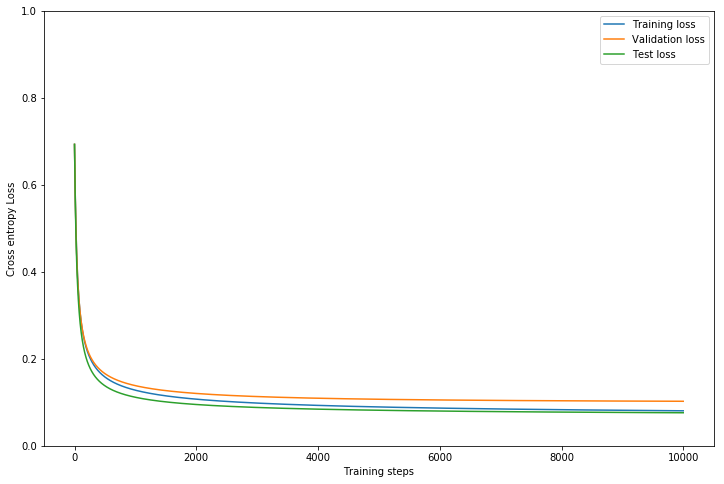

0.973125
0.967
0.975


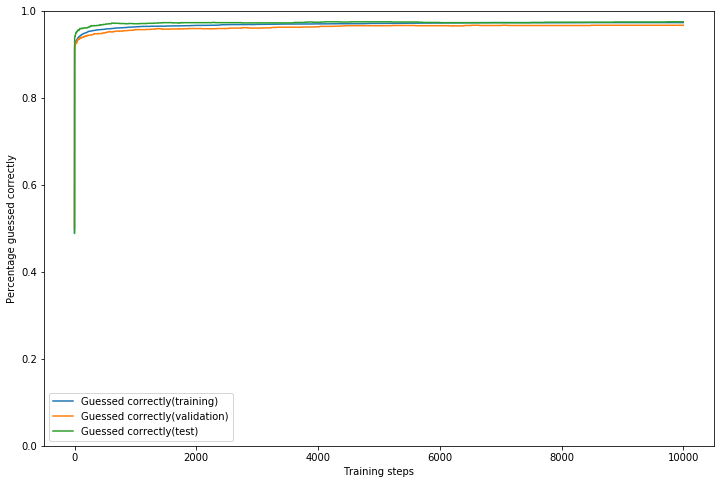

In [183]:
import mnist
import numpy as np
import matplotlib.pyplot as plt # Plotting library

#mnist.init()
X_train, Y_train, X_test, Y_test = mnist.load()

#using only images decipting a 2 or 3
X_train = X_train[(Y_train == 3) | (Y_train == 2)]/255
Y_train = Y_train[(Y_train == 3) | (Y_train == 2)]
Y_train = (Y_train == 2).astype(int)
ones = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X_train,ones), axis = 1)
print(X_train.shape)

X_test = X_test[(Y_test == 3) | (Y_test == 2)]/255
Y_test = Y_test[(Y_test == 3) | (Y_test == 2)]
Y_test = (Y_test == 2).astype(int)

NUMBER_IN_TRAINING_SET = 10000;
NUMBER_IN_TEST_SET =2000;
NUMBER_IN_VALIDATION_SET = 2000;

print(Y_train.shape)
#Test sets
X_test_set = X_train[NUMBER_IN_TRAINING_SET:NUMBER_IN_TRAINING_SET + NUMBER_IN_TEST_SET];
Y_test_set = Y_train[NUMBER_IN_TRAINING_SET:NUMBER_IN_TRAINING_SET + NUMBER_IN_TEST_SET];

#for debugging purposes
X_train = X_train[0:NUMBER_IN_TRAINING_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET];



#Split into validation and training set
X_validation = X_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];
Y_validation = Y_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];

X_train = X_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];





#implementing gradient descent


m = 10000
learning_rate = 0.01

def cross_entropy_loss_function(target, output_probability):
    N=target.size
    return -(np.dot(target,np.log(output_probability))+np.dot((1-target),np.log(1-output_probability)))/N

def values_guessed_correctly_percentage(probabilities_of_values, actual_values):
    VALUES_GUESSED=np.zeros(probabilities_of_values.size)
    correctly_guessed_numbers=0;
    for i in range(probabilities_of_values.size):
        if probabilities_of_values[i]<0.5:
            VALUES_GUESSED[i]=0
        else:
            VALUES_GUESSED[i]=1
        if VALUES_GUESSED[i]==actual_values[i]:
            correctly_guessed_numbers+=1
    return (correctly_guessed_numbers/(probabilities_of_values.size))

TRAIN_LOSS = np.zeros(m)
TEST_LOSS = np.zeros(m)
VALIDATION_LOSS = np.zeros(m)

TRAIN_PERCENTAGE_CORRECTLY = np.zeros(m)
VALIDATION_PERCENTAGE_CORRECTLY = np.zeros(m)
TEST_PERCENTAGE_CORRECTLY = np.zeros(m)

WEIGHTS=[[],[],[]]
STEP = np.zeros(m)

#for early stopping
cost_increase_in_a_row = 0;
iteration_should_stop = 0;
end_weights = np.zeros(X_train[0].size)


#Training routine

weights = np.zeros(X_train[0].size)

for i in range(0,m):
    
    
    
    probability = 1 / (1 + np.exp(np.dot(X_train,weights))) #mulig pluss/minus-feil
    validation_set_probability = 1 / (1 + np.exp(np.dot(X_validation,weights)))
    test_set_probability = 1 / (1 + np.exp(np.dot(X_test_set,weights)))
    
    TRAIN_LOSS[i]=cross_entropy_loss_function(Y_train,probability)
    VALIDATION_LOSS[i]=cross_entropy_loss_function(Y_validation,validation_set_probability)
    TEST_LOSS[i]=cross_entropy_loss_function(Y_test_set,test_set_probability)
    
    TRAIN_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage(probability,Y_train)
    VALIDATION_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage(validation_set_probability,Y_validation)
    TEST_PERCENTAGE_CORRECTLY[i]= values_guessed_correctly_percentage(test_set_probability,Y_test_set)
    
    STEP[i]=i
    
    #For early stopping
    if (i>10000 and VALIDATION_LOSS[i]>VALIDATION_LOSS[i-1]):
        cost_increase_in_a_row +=1
        if(cost_increase_in_a_row>2):
            print("i: ",i)
            iteration_should_stop=i-3;
            end_weights = WEIGHTS[(i-2)%3]
            break
    else:
        iteration_should_stop=i
        cost_increase_in_a_row = 0
    WEIGHTS[i%3]=weights
    

    error = Y_train - probability
    weights = weights - (learning_rate * np.dot(error,X_train)/(NUMBER_IN_TRAINING_SET-NUMBER_IN_VALIDATION_SET))


#print(weights)
#print(LOSS)
#print(Y_train)
#print(probability)
#print(TRAIN_LOSS)
#print(TEST_LOSS)

plt.figure(figsize=(12, 8 ))
plt.ylim([0, 1])
plt.xlabel("Training steps")
plt.ylabel("Cross entropy Loss")
plt.plot(STEP[0:iteration_should_stop], TRAIN_LOSS[0:iteration_should_stop], label="Training loss")
plt.plot(STEP[0:iteration_should_stop], VALIDATION_LOSS[0:iteration_should_stop], label="Validation loss")
plt.plot(STEP[0:iteration_should_stop], TEST_LOSS[0:iteration_should_stop], label="Test loss")
plt.legend() # Shows graph labels

plt.show()

plt.figure(figsize=(12, 8 ))
plt.ylim([0, 1])
plt.xlabel("Training steps")
plt.ylabel("Percentage guessed correctly")
plt.plot(STEP[0:iteration_should_stop], TRAIN_PERCENTAGE_CORRECTLY[0:iteration_should_stop], label="Guessed correctly(training)")
plt.plot(STEP[0:iteration_should_stop], VALIDATION_PERCENTAGE_CORRECTLY[0:iteration_should_stop], label="Guessed correctly(validation)")
plt.plot(STEP[0:iteration_should_stop], TEST_PERCENTAGE_CORRECTLY[0:iteration_should_stop], label="Guessed correctly(test)")
print(TRAIN_PERCENTAGE_CORRECTLY[iteration_should_stop]);
print(VALIDATION_PERCENTAGE_CORRECTLY[iteration_should_stop]);
print(TEST_PERCENTAGE_CORRECTLY[iteration_should_stop]);
#plt.plot(TRAINING_STEP, VAL_LOSS, label="Validation loss")
plt.legend() # Shows graph labels

plt.show()

weights_2_1 = weights

0.8274274274274275
0.7771771771771772
0.592992992992993


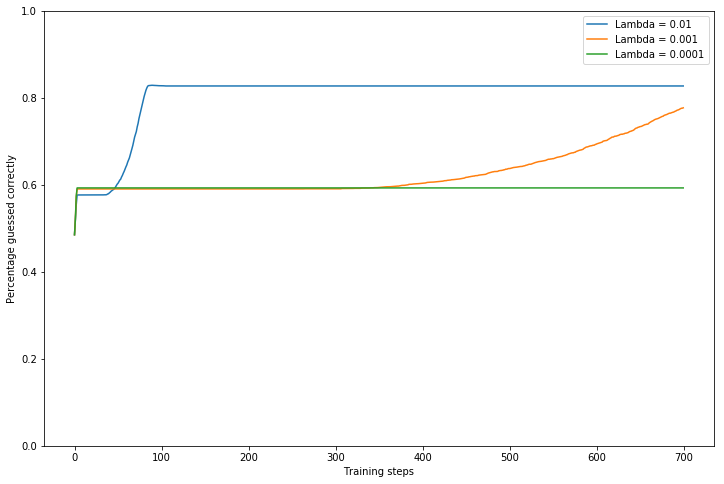

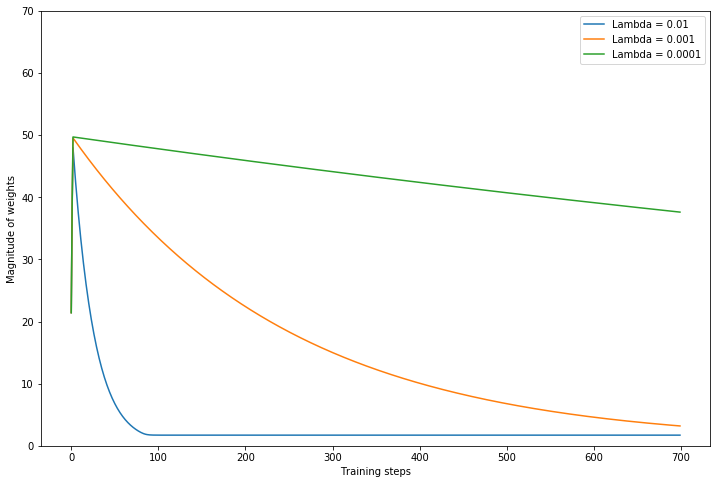

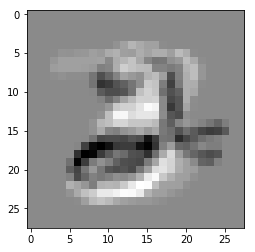

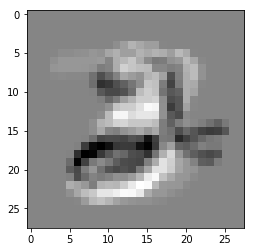

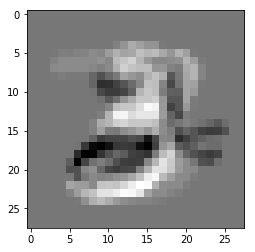

3.1936360942981805
3.1963304378075437


In [184]:
#mnist.init()
X_train, Y_train, X_test, Y_test = mnist.load()

#using only images decipting a 2 or 3
X_train = X_train[(Y_train == 3) | (Y_train == 2)]/255
Y_train = Y_train[(Y_train == 3) | (Y_train == 2)]
Y_train = (Y_train == 2).astype(int)
ones = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X_train,ones), axis = 1)

X_test = X_test[(Y_test == 3) | (Y_test == 2)]/255
Y_test = Y_test[(Y_test == 3) | (Y_test == 2)]
Y_test = (Y_test == 2).astype(int)

NUMBER_IN_TRAINING_SET = 5000;
NUMBER_IN_VALIDATION_SET = 4995;


#for debugging purposes
X_train = X_train[0:NUMBER_IN_TRAINING_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET];



#Split into validation and training set
X_validation = X_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];
Y_validation = Y_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];

X_train = X_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];

m = 700
learning_rate = 10

lambda_1= 0.01
lambda_2= 0.001
lambda_3= 0.0001
weights_1 = np.zeros(X_train[0].size)
weights_2 = np.zeros(X_train[0].size)
weights_3 = np.zeros(X_train[0].size)
magnitude_1 = np.zeros(m)
magnitude_2 = np.zeros(m)
magnitude_3 = np.zeros(m)
STEP = np.zeros(m)
VALIDATION_PERCENTAGE_CORRECTLY_1 = np.zeros(m)
VALIDATION_PERCENTAGE_CORRECTLY_2 = np.zeros(m)
VALIDATION_PERCENTAGE_CORRECTLY_3 = np.zeros(m)


def cross_entropy_loss_function_regularized(target, output_probability, weights):
    N=target.size
    #print(     (-(np.dot(target,np.log(output_probability))+np.dot((1-target),np.log(1-output_probability)))/N +lamda*np.linalg.norm(weights, ord=None)**2 ))

    return (-(np.dot(target,np.log(output_probability))+np.dot((1-target),np.log(1-output_probability)))/N +lamda*np.linalg.norm(weights, ord=None)**2 )

def values_guessed_correctly_percentage(probabilities_of_values, actual_values):
    VALUES_GUESSED=np.zeros(probabilities_of_values.size)
    correctly_guessed_numbers=0;
    for i in range(probabilities_of_values.size):
        if probabilities_of_values[i]<0.5:
            VALUES_GUESSED[i]=0
        else:
            VALUES_GUESSED[i]=1
        if VALUES_GUESSED[i]==actual_values[i]:
            correctly_guessed_numbers+=1
    return (correctly_guessed_numbers/(probabilities_of_values.size))

#Training loop



for i in range(0,m):
    
    
    
    probability_1 = 1 / (1 + np.exp(np.dot(X_train,weights_1))) #mulig pluss/minus-feil
    validation_set_probability_1 = 1 / (1 + np.exp(np.dot(X_validation,weights_1)))
    probability_2 = 1 / (1 + np.exp(np.dot(X_train,weights_2))) #mulig pluss/minus-feil
    validation_set_probability_2 = 1 / (1 + np.exp(np.dot(X_validation,weights_2)))
    probability_3 = 1 / (1 + np.exp(np.dot(X_train,weights_3))) #mulig pluss/minus-feil
    validation_set_probability_3 = 1 / (1 + np.exp(np.dot(X_validation,weights_3)))
    
    

    VALIDATION_PERCENTAGE_CORRECTLY_1[i] = values_guessed_correctly_percentage(validation_set_probability_1,Y_validation)
    VALIDATION_PERCENTAGE_CORRECTLY_2[i] = values_guessed_correctly_percentage(validation_set_probability_2,Y_validation)
    VALIDATION_PERCENTAGE_CORRECTLY_3[i] = values_guessed_correctly_percentage(validation_set_probability_3,Y_validation)
    
   
    error_1 = Y_train - probability_1
    error_2 = Y_train - probability_2
    error_3 = Y_train - probability_3
    
    weights_1 = weights_1 - learning_rate * (np.dot(error_1,X_train)+ 2*lambda_1*weights_1)/(NUMBER_IN_TRAINING_SET-NUMBER_IN_VALIDATION_SET)
    weights_2 = weights_2 - learning_rate * (np.dot(error_2,X_train)+ 2*lambda_2*weights_2)/(NUMBER_IN_TRAINING_SET-NUMBER_IN_VALIDATION_SET)
    weights_3 = weights_3 - learning_rate * (np.dot(error_3,X_train)+ 2*lambda_3*weights_3)/(NUMBER_IN_TRAINING_SET-NUMBER_IN_VALIDATION_SET)
    
    magnitude_1[i] = np.linalg.norm(weights_1)
    magnitude_2[i] = np.linalg.norm(weights_2)
    magnitude_3[i] = np.linalg.norm(weights_3)
    
    STEP[i]=i
    
    



plt.figure(figsize=(12, 8 ))
plt.ylim([0, 1])
plt.xlabel("Training steps")
plt.ylabel("Percentage guessed correctly")
plt.plot(STEP[0:m], VALIDATION_PERCENTAGE_CORRECTLY_1[0:m], label="Lambda = 0.01")
plt.plot(STEP[0:m], VALIDATION_PERCENTAGE_CORRECTLY_2[0:m], label="Lambda = 0.001")
plt.plot(STEP[0:m], VALIDATION_PERCENTAGE_CORRECTLY_3[0:m], label="Lambda = 0.0001")
print(VALIDATION_PERCENTAGE_CORRECTLY_1[m-1]);
print(VALIDATION_PERCENTAGE_CORRECTLY_2[m-1]);
print(VALIDATION_PERCENTAGE_CORRECTLY_3[m-1]);

#plt.plot(TRAINING_STEP, VAL_LOSS, label="Validation loss")
plt.legend() # Shows graph labels

plt.show()

plt.figure(figsize=(12, 8 ))
plt.ylim([0, 70])
plt.xlabel("Training steps")
plt.ylabel("Magnitude of weights")
plt.plot(STEP[0:m], magnitude_1[0:m], label="Lambda = 0.01")
plt.plot(STEP[0:m], magnitude_2[0:m], label="Lambda = 0.001")
plt.plot(STEP[0:m], magnitude_3[0:m], label="Lambda = 0.0001")
plt.legend() # Shows graph labels
plt.show()

plt.imshow(weights_1[0:784].reshape(28,28),cmap='gray')
plt.show()

plt.imshow(weights_2[0:784].reshape(28,28),cmap='gray')
plt.show()

plt.imshow(weights_3[0:784].reshape(28,28),cmap='gray')
plt.show()

#print(weights_2_1-weights)
print(np.linalg.norm(weights))
print(magnitude_2[m-1])

(60000, 785)
(60000,)
[5 9 7 ... 9 3 4]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


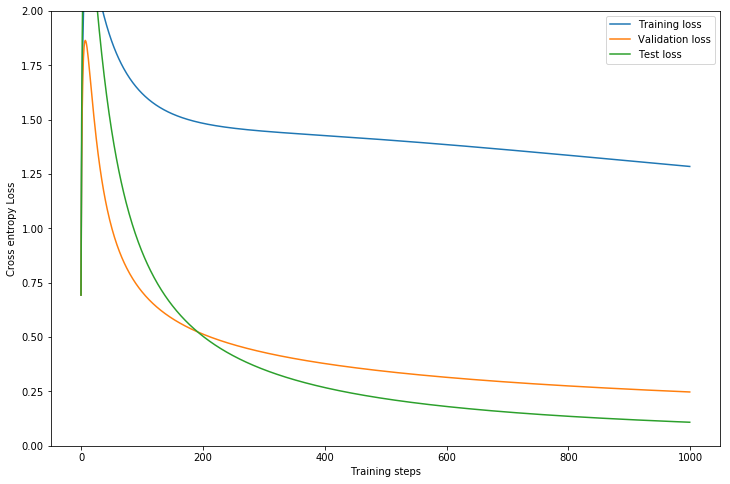

0.8874444444444445
0.905
0.8885


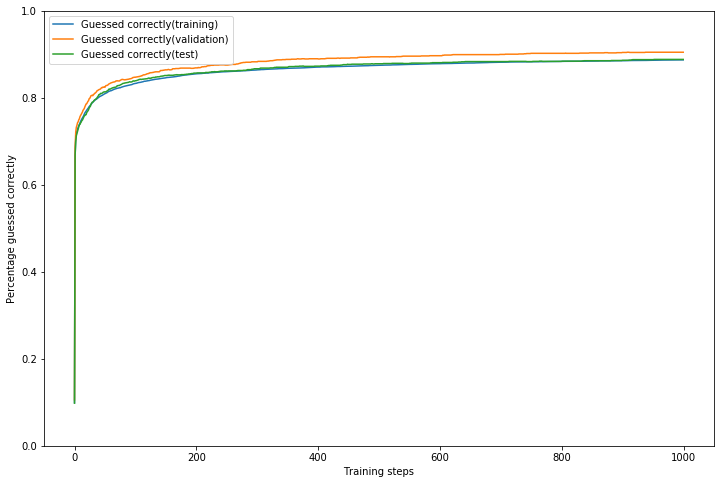

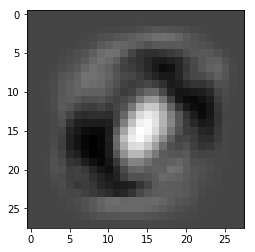

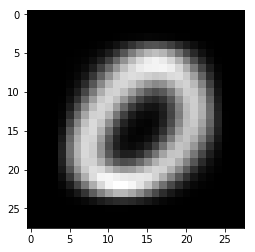

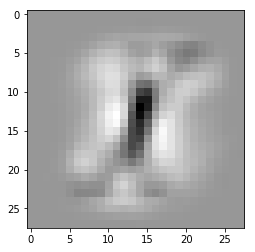

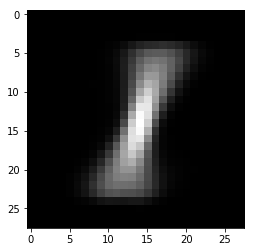

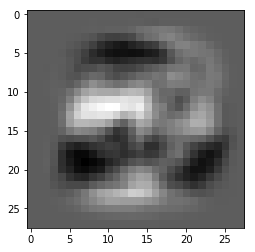

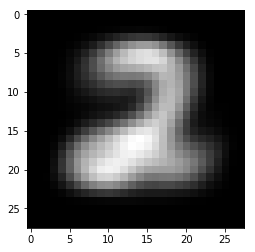

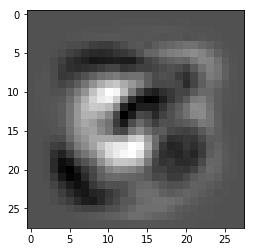

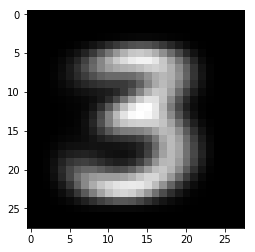

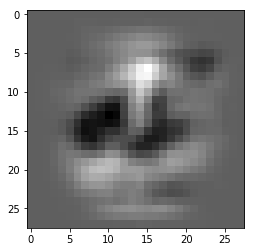

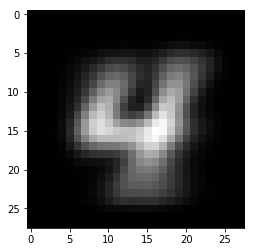

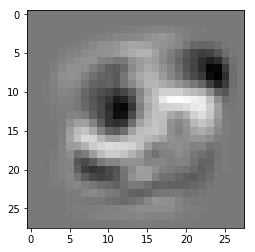

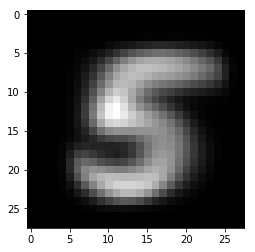

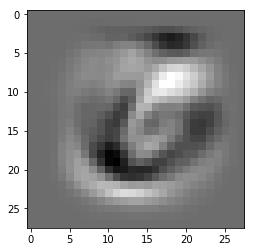

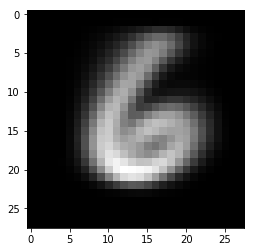

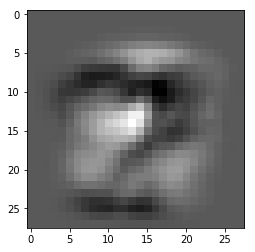

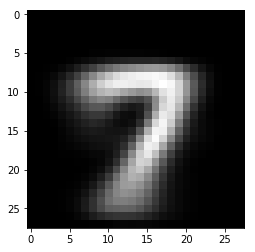

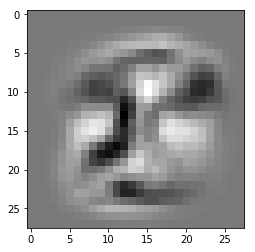

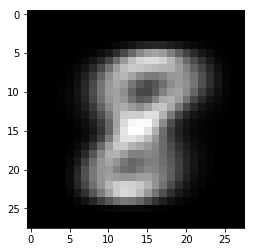

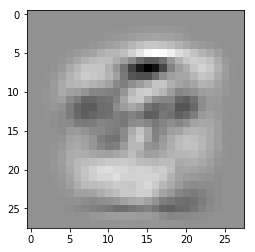

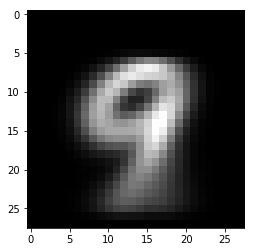

In [60]:
import mnist
import numpy as np
import matplotlib.pyplot as plt # Plotting library

X_train, Y_train, X_test, Y_test = mnist.load()

ones = np.ones((X_train.shape[0],1))
#Bias trick
X_train = np.concatenate((X_train,ones), axis = 1)

print(X_train.shape)

NUMBER_IN_TRAINING_SET = 20000;
NUMBER_IN_TEST_SET =2000;
NUMBER_IN_VALIDATION_SET = 2000;

print(Y_train.shape)
#Test sets
X_test_set = X_train[NUMBER_IN_TRAINING_SET:NUMBER_IN_TRAINING_SET + NUMBER_IN_TEST_SET];
Y_test_set = Y_train[NUMBER_IN_TRAINING_SET:NUMBER_IN_TRAINING_SET + NUMBER_IN_TEST_SET];

#for debugging purposes
X_train = X_train[0:NUMBER_IN_TRAINING_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET];

#Split into validation and training set
X_validation = X_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];
Y_validation = Y_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];

X_train = X_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];

print(Y_test_set)


m=1000
learning_rate=0.000001
lambda_1 = 1000

def cross_entropy_loss_function_softmax(target, output_probability):
    N=target.size
    #print(-(np.dot(target,np.log(np.transpose(output_probability))))[0][0])
    return -(np.dot(target,np.log(np.transpose(output_probability))))[0][0]

def one_hot_encode_array(array):
    n_values = np.max(array)+1
    temp_array=np.eye(n_values)[array]
    return temp_array
    #print(temp_array)
    

def values_guessed_correctly_percentage_softmax(probabilities_of_values, actual_values): 
    correctly_guessed_numbers=0;
    for i in range(np.transpose(probabilities_of_values)[0].size):
        if np.argmax(probabilities_of_values[i])== np.argmax(actual_values[i]):
            correctly_guessed_numbers+=1
    return (correctly_guessed_numbers/(np.transpose(probabilities_of_values)[0].size))

TRAIN_LOSS = np.zeros(m)
VALIDATION_LOSS = np.zeros(m)
TEST_LOSS = np.zeros(m)

TRAIN_PERCENTAGE_CORRECTLY = np.zeros(m)
VALIDATION_PERCENTAGE_CORRECTLY = np.zeros(m)
TEST_PERCENTAGE_CORRECTLY = np.zeros(m)
STEP= np.zeros(m)

Original_Y_train = Y_train
Y_train = one_hot_encode_array(Y_train)
Y_validation = one_hot_encode_array(Y_validation)
Y_test_set = one_hot_encode_array(Y_test_set)

print(Y_train)
weights = np.zeros((X_train[0].size, np.max(Y_test)+1))

for i in range(0,m):
    
    

    probability = 1 / ((1 + np.exp(np.dot(X_train,weights)))) #mulig pluss/minus-feil
    validation_set_probability = 1 / (1 + np.exp(np.dot(X_validation,weights)))
    test_set_probability = 1 / (1 + np.exp(np.dot(X_test_set,weights)))
    
    TRAIN_LOSS[i]=cross_entropy_loss_function_softmax(Y_train,probability)
    VALIDATION_LOSS[i]=cross_entropy_loss_function_softmax(Y_validation,validation_set_probability)
    TEST_LOSS[i]=cross_entropy_loss_function_softmax(Y_test_set,test_set_probability)
    
    TRAIN_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage_softmax(probability,Y_train)
    VALIDATION_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage_softmax(validation_set_probability,Y_validation)
    TEST_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage_softmax(test_set_probability,Y_test_set)
    STEP[i]=i
    
    error = Y_train - probability
    np.dot(np.transpose(error),X_train)
    
    transpose_weights = np.transpose(weights) - (learning_rate*(np.dot(np.transpose(error),X_train)+2*lambda_1*np.transpose(weights))/(NUMBER_IN_TRAINING_SET-NUMBER_IN_VALIDATION_SET))
    weights=np.transpose(transpose_weights)


plt.figure(figsize=(12, 8 ))
plt.ylim([0, 2])
plt.xlabel("Training steps")
plt.ylabel("Cross entropy Loss")
plt.plot(STEP[0:m], TRAIN_LOSS[0:m], label="Training loss")
plt.plot(STEP[0:m], VALIDATION_LOSS[0:m], label="Validation loss")
plt.plot(STEP[0:m], TEST_LOSS[0:m], label="Test loss")
plt.legend() # Shows graph labels
plt.show()

plt.figure(figsize=(12, 8 ))
plt.ylim([0, 1])
plt.xlabel("Training steps")
plt.ylabel("Percentage guessed correctly")
plt.plot(STEP[0:m], TRAIN_PERCENTAGE_CORRECTLY[0:m], label="Guessed correctly(training)")
plt.plot(STEP[0:m], VALIDATION_PERCENTAGE_CORRECTLY[0:m], label="Guessed correctly(validation)")
plt.plot(STEP[0:m], TEST_PERCENTAGE_CORRECTLY[0:m], label="Guessed correctly(test)")
print(TRAIN_PERCENTAGE_CORRECTLY[m-1]);
print(VALIDATION_PERCENTAGE_CORRECTLY[m-1]);
print(TEST_PERCENTAGE_CORRECTLY[m-1]);
#plt.plot(TRAINING_STEP, VAL_LOSS, label="Validation loss")
plt.legend() # Shows graph labels

plt.show()


# Task 3c)
X_train=np.delete(X_train,784,1)
for i in range(weights[0].size):
    average = np.mean(X_train[(Original_Y_train == i)],axis = 0)
    plt.imshow(np.transpose(weights)[i][0:784].reshape(28,28),cmap='gray')
    plt.show()
    plt.imshow(average[0:784].reshape(28,28),cmap='gray')
    plt.show()





